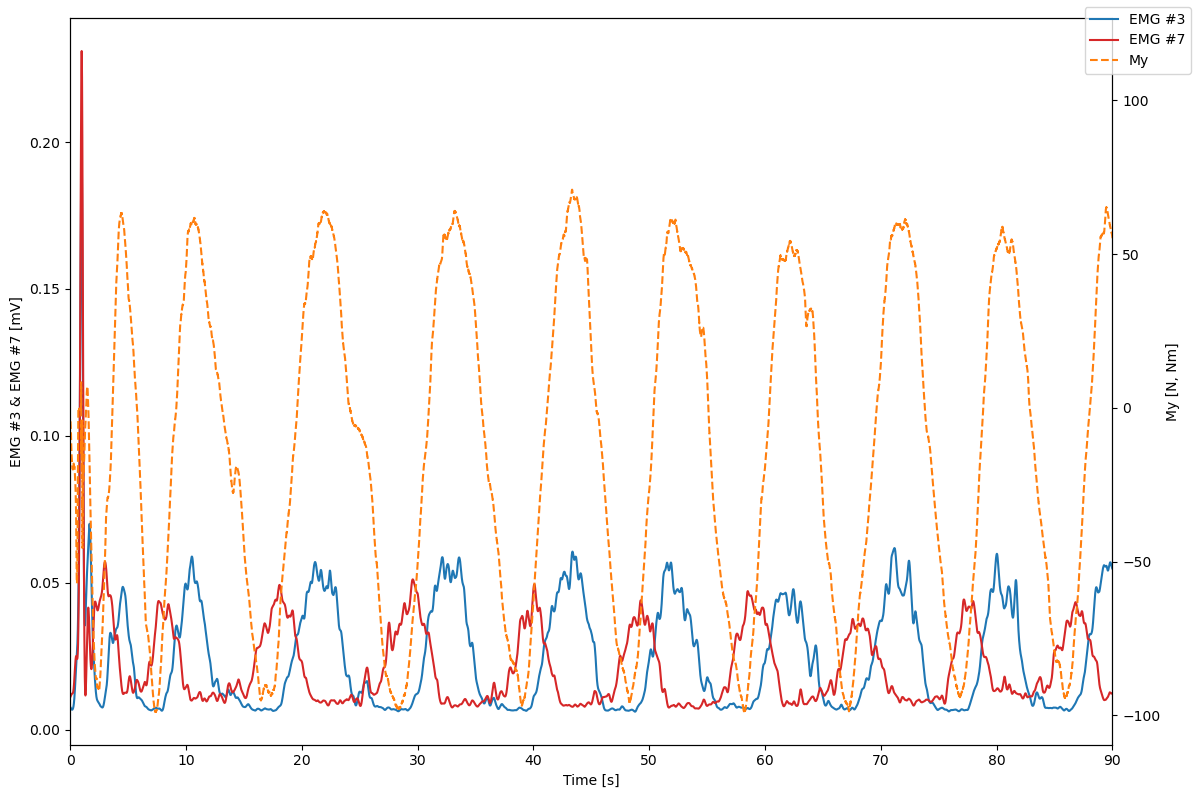

In [25]:
"""Plot both recorded EMG signal and GRF.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from plot_emg import remove_offset, rectify, lpf


def main():
    # Setup variables
    t0 =  0.0                        # time of the beginning of the plot [s] (this time is included)
    t1 = 90.0                        # time of the end of the plot [s] (this time is NOT included!)
    filename_emg = "emg1.csv"         # filename of EMG data
    filename_grf = "forceplate1.csv"  # filename of GRF data
    figname = "../results/assignment2/EMG3&7_MY.png"      # filename of the output figure
    idx_emg = 2, 5  # EMG signal to be shown (0: EMG #1, 1: EMG #2, ..., 5: EMG #6)
    idx_grf = 4  # GRF signal to be shown (0: Fx, 1: Fy, 2: Fz, 3: Mx, 4: My, 5: Mz)
    t_offset = -9.0  # start time of the GRF signal with respect to that of the EMG signal [s]

    # Load an EMG data.
    df_emg = pd.read_csv(filename_emg, usecols=[0, 1, 21, 41, 61, 81, 101])
    df_grf = pd.read_csv(filename_grf, header=31, usecols=[1, 3, 4, 5, 6, 7, 8])

    # Remove not-available values in the end of the time column
    df_emg = df_emg.dropna()

    # Extract time and EMG data separately
    times_emg = df_emg.values[:, 0]          # time [s]
    data_emg  = df_emg.values[:, 1:] * 1000  # EMG values [mV]

    # Extract time and GRF data separately
    times_grf = df_grf.values[:, 0]  # time [s]
    data_grf = df_grf.values[:, 1:]  # GRF values [N, Nm]

    # Synchronize time of EMG and GRF signal
    times_grf += t_offset

    # Process the EMG data
    data_emg = remove_offset(data_emg)         # 1) Remove offset values
    data_emg = rectify(data_emg)               # 2) Rectify the data
    data_emg = lpf(data_emg, times_emg, fc=2)  # 3.1) Apply low-pass filter

    # Setup graph labels
    labels_emg = ["EMG #1", "EMG #2", "EMG #3", "EMG #4", "EMG #6", "EMG #7"]
    labels_grf = ["Fx", "Fy", "Fz", "Mx", "My", "Mz"]

    # Plot the data
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    ax1.plot(times_emg, data_emg[:, idx_emg[0]], color="C0", label=labels_emg[idx_emg[0]])
    ax1.plot(times_emg, data_emg[:, idx_emg[1]], color="C3", label=labels_emg[idx_emg[1]])
    ax2.plot(times_grf, data_grf[:, idx_grf], color="C1", label=labels_grf[idx_grf], linestyle='dashed')
    ax1.set_xlabel("Time [s]")
    ax1.set_xlim((t0, t1))
    ax1.set_ylabel(labels_emg[idx_emg[0]] + ' & ' + labels_emg[idx_emg[1]] + " [mV]")
    ax2.set_ylabel(labels_grf[idx_grf] + " [N, Nm]")
    fig.legend()
    fig.tight_layout()

    # Save the figure
    plt.savefig(figname)

    # Show the figure
    plt.show()


if __name__ == "__main__":
    main()
